In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pwd = os.getcwd()
df = pd.read_csv(pwd + '/concrete.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [24]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

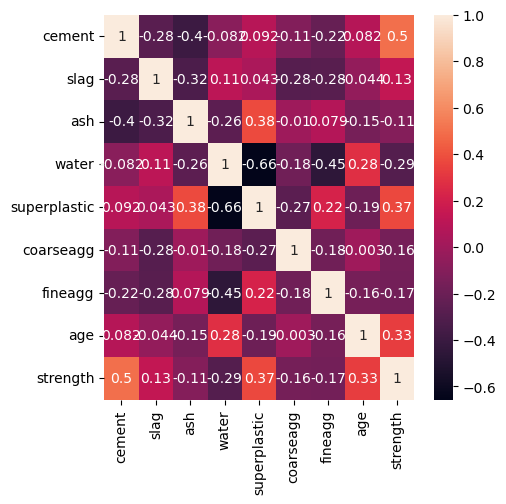

In [25]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=df.corr(), annot=True);

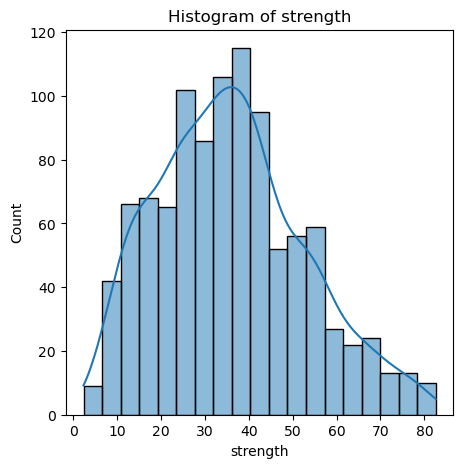

In [26]:
plt.figure(figsize=(5, 5))
plt.title('Histogram of strength')
sns.histplot(data=df,x='strength', kde=True);

In [27]:
X = df.drop('strength', axis=1)
y = df['strength']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
model = GradientBoostingRegressor()        

In [31]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

mean absolute error: 3.988676340549898
Mean squared error: 30.200750615326008
Root Mean Squared Error: 5.495520959411038
R2 Score: 0.8944540660994419


In [34]:
feat_impt = pd.DataFrame(model.feature_importances_, index=X.columns)
feat_impt

,0
cement,0.303811
slag,0.076800
ash,0.015823
water,0.081987
superplastic,0.105422
coarseagg,0.012502
fineagg,0.044453
age,0.359202


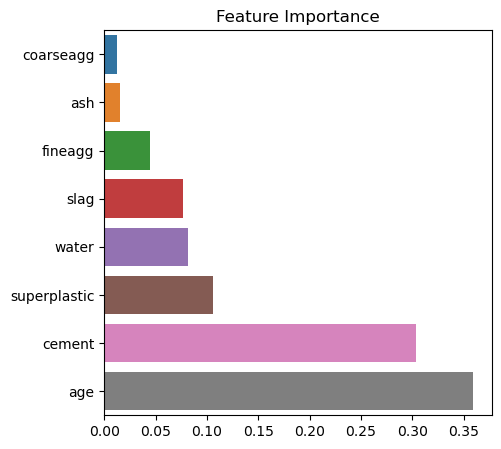

In [36]:
plt.figure(figsize=(5, 5))
plt.title('Feature Importance')
sns.barplot(data= feat_impt.sort_values(0).T, orient="h");